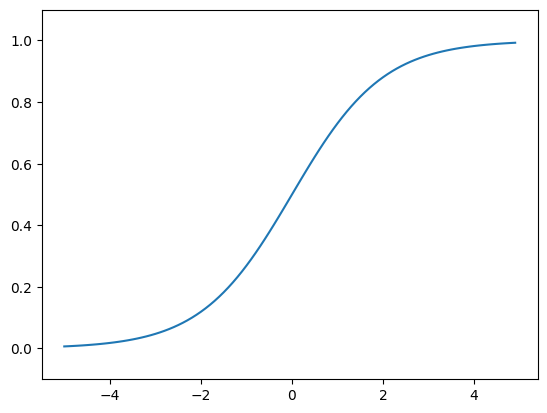

In [1]:
import numpy as np
import sys,os
import matplotlib.pyplot as plt
import struct
import pickle
from softmax import softmax 
from gradient import numerical_gradient
from cross_entropy_error import cross_entropy_error
from sigmoid import sigmoid

# いらないです。これは他の機能との繰り返しである。

# def load_mnist(path, kind='train'):
#     """Load MNIST data from `path`."""
#     labels_path = os.path.join(path,
#                             '%s-labels-idx1-ubyte' % kind)
#     images_path = os.path.join(path,
#                             '%s-images-idx3-ubyte' % kind)

#     # gzip.open() を open() に変更
#     with open(labels_path, 'rb') as lbpath:
#         labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
#                                offset=8)

#     with open(images_path, 'rb') as imgpath:
#         images = np.frombuffer(imgpath.read(), dtype=np.uint8,
#                                offset=16).reshape(len(labels), 784)

#     return images, labels

# def save_to_pickle(data, filename):
#     """Save data to a pickle file."""
#     with open(filename, 'wb') as f:
#         pickle.dump(data, f)

# # データの読み込み
# X_train, y_train = load_mnist('./dataset', kind='train')
# X_test, y_test = load_mnist('./dataset', kind='t10k')

# # pickleファイルに保存
# save_to_pickle((X_train, y_train), 'mnist_train.pkl')
# save_to_pickle((X_test, y_test), 'mnist_test.pkl')

In [2]:
def load_mnist(path='mini-project/hiroka-s-minipro2024/study_dataset', kind='train', normalize=False,one_hot_label=True):
    """MNISTデータセットを読み込む関数

    Args:
        path (str): データセットのファイルが置かれているディレクトリのパス
        kind (str, optional): "train" or "t10k". Defaults to "train".

    Returns:
        tuple: 画像データのNumPy配列, ラベルデータのNumPy配列
    """

    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), rows, cols)

    return images, labels

In [3]:
# このファイルのパスをあなたのフォルダー・パスに変更してください。

x_train, t_train = load_mnist(path='./dataset', kind='train')
x_test, t_test = load_mnist(path='./dataset', kind='t10k')

print(x_train.shape)
print(t_test.shape)

(60000, 28, 28)
(10000,)


In [4]:
# # page 76 of the book 

# def init_network():
#     with open("sample_weight.pkl", 'rb') as f:
#         network = pickle.load(f)
#     return network

# def predict(network, x):
#     W1, W2, W3 = network['W1'], network['W2'], network['W3']
#     b1, b2, b3 = network['b1'], network['b2'], network['b3']
#     a1 = np.dot(x, W1) + b1
#     z1 = sigmoid(a1)
#     a2 = np.dot(z1, W2) + b2
#     z2 = sigmoid(a2)
#     a3 = np.dot(z2, W3) + b3
#     y = softmax(a3)
#     return y



In [5]:
# network = init_network()

# x,t= x_test.reshape(-1, 28*28), t_test     # reshape to match the sample_weight.pkl

In [6]:
# #page 76-77

# accuracy_cnt = 0
# for i in range(len(x)):
#     y = predict(network, x[i])
#     p = np.argmax(y) # 最も確率の高い要素のインデックスを取得
#     if p == t[i]:
#         accuracy_cnt += 1
#     print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

In [7]:
# # page 80

# x,t= x_test.reshape(-1, 28*28), t_test     # reshape to match the sample_weight.pkl, #x, t = get_data()
# network = init_network()
# batch_size = 100 # バッチの数
# accuracy_cnt = 0
# for i in range(0, len(x), batch_size):
#     x_batch = x[i:i+batch_size]
#     y_batch = predict(network, x_batch)
#     p = np.argmax(y_batch, axis=1)
#     accuracy_cnt += np.sum(p == t[i:i+batch_size])

# print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

In [8]:
# page 92, あなたのload_mnistのコードに合わせて変更しました。

#第4章では、one hot encodingが重要である。クロスエントロピー損失関数を使うからだ。


def change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T
import sys, os

x_train, t_train = load_mnist(path='./dataset', kind='train')
x_test, t_test = load_mnist(path='./dataset', kind='t10k')


#reshape to match sample_weights.pkl 
x_train, x_test = x_train.reshape(-1,28*28), x_test.reshape(-1, 28*28)
#one-hot encoding 
t_train, t_test = change_one_hot_label (t_train), change_one_hot_label(t_test)

print(x_train.shape, t_train.shape) # (60000, 784)
print(t_train.shape, t_test.shape) # (60000, 10)



(60000, 784) (60000, 10)
(60000, 10) (10000, 10)


In [9]:
#page 114, changed some codes 
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,
    weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * \
        np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
        np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

In [10]:
# # page 118, changed some codes 
# #また、より長くネットワークを訓練するために、iter_num変数をより大きな数値に変更する。
# train_loss_list = []
# # ハイパーパラメータ
# iters_num = 10      # please increase this 
# batch_size = 100
# learning_rate = 0.1
# train_size = x_train.shape[0] # added this one for managing batch training 

# network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# for i in range(iters_num):
#     # ミニバッチの取得
#     batch_mask = np.random.choice(train_size, batch_size)
#     x_batch = x_train[batch_mask]
#     t_batch = t_train[batch_mask]
#     # 勾配の計算
#     grad = network.numerical_gradient(x_batch, t_batch)
#     # grad = network.gradient(x_batch, t_batch) # 高速版!
#     # パラメータの更新
#     for key in ('W1', 'b1', 'W2', 'b2'):
#         network.params[key] -= learning_rate * grad[key]
#         # 学習経過の記録
#     loss = network.loss(x_batch, t_batch)
#     train_loss_list.append(loss)
#     print(i,"--------->", loss)

In [11]:
# #draw the loss graphs at page 119
# import matplotlib.pyplot as plt 

# plt.plot(range(len(train_loss_list)), train_loss_list)
# plt.ylabel("loss")
# plt.xlabel("iteration")
# plt.show()

In [ ]:
#page 120 

train_loss_list = []
train_acc_list = []
test_acc_list = []
# 1 エポックあたりの繰り返し数
train_size = x_train.shape[0] # added this one for managing batch training 
batch_size = 100

iter_per_epoch = max(train_size / batch_size, 1)
# ハイパーパラメータ
iters_num = 1000 
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    # 勾配の計算
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 高速版!
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1 エポックごとに認識精度を計算
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


train acc, test acc | 0.24038333333333334, 0.2392
